<a href="https://colab.research.google.com/github/AhmedBuckets/SPS622/blob/main/Ahmed_Elsaeyed_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ahmed Elsaeyed

# Data622

# Assignment 2


I chose to use the following data for this assignment:
https://www.kaggle.com/datasets/brendan45774/test-file/

It is a record of the passengers of the Titanic which tragically sank in 1912. It contains details about the passengers and whether or not they survived the sinking. The idea here is to use decision trees to explore what features affected one's likelihood of survival.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import numpy

In [55]:
# I load the data from my github
titanic_passenger_data = pd.read_csv('https://raw.githubusercontent.com/AhmedBuckets/SPS622/main/titanic_passenger_data.csv')

In [56]:
titanic_passenger_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
# Chcking for nulls
titanic_passenger_data.isnull().values.any()

True

In [58]:
# The cell above showed me that there were null values somewhere in the dataframe
# The below shows the rows that contain null values. They mostly occur in the cabin column, which I hoped to use as a good feature.
titanic_passenger_data[titanic_passenger_data.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


I decided to do some more digging into the null values in the cabin column.

In [59]:
titanic_passenger_data['Cabin'].isnull().values.ravel().sum()

687

In [60]:
count_cabins = titanic_passenger_data.value_counts(titanic_passenger_data['Cabin'], sort = True)
count_cabins

Cabin
C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
C101           1
B94            1
B86            1
B82 B84        1
T              1
Length: 147, dtype: int64

687 out of 891 records are missing data for cabin. I will remove the column since it is missing so much data, and since as it is it isn't possible to discern any difference between the cabins.

If the data was there and I could make some assumptions about the cabin codes (maybe different sections of the ship) then I would break out the cabin codes and use the letter designation (A, B, C ...) in the decision tree.

In [61]:
# Removing the Cabin column along with other columns that shouldnt affect the tree
titanic_passenger_data = titanic_passenger_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)



In [62]:
# Factorizing some columns I know to be categorical
titanic_passenger_data['Survived'] = pd.factorize(titanic_passenger_data['Survived'])[0]
titanic_passenger_data['Pclass'] = pd.factorize(titanic_passenger_data['Pclass'])[0]
titanic_passenger_data['Embarked'] = pd.factorize(titanic_passenger_data['Embarked'])[0]
titanic_passenger_data['Sex'] = pd.factorize(titanic_passenger_data['Sex'])[0]


In [63]:
titanic_passenger_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,0,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,0,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,0,1,NaN,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


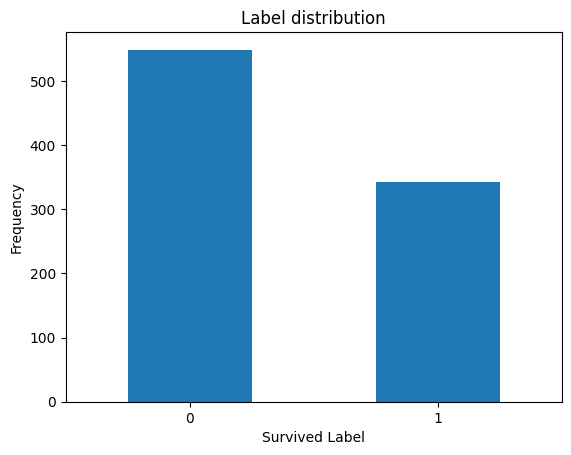

In [64]:
count_classes = titanic_passenger_data.value_counts(titanic_passenger_data['Survived'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Label distribution")
plt.xlabel("Survived Label")
plt.ylabel("Frequency");

In [65]:
titanic_passenger_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Thankfully the data is not skewed as far as the class label is concerned.

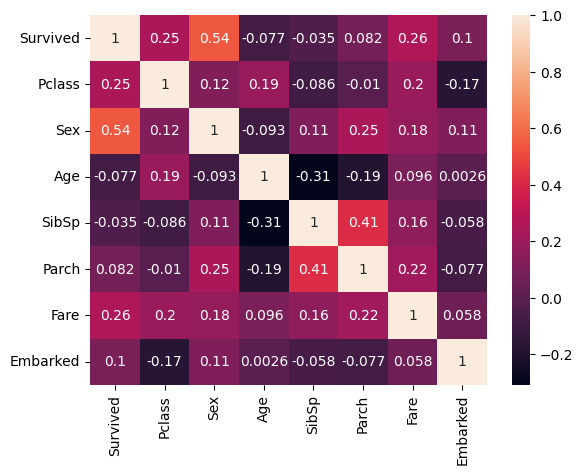

In [66]:
# correlations
titanic_passenger_data.corr()
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = titanic_passenger_data.corr()
#plt.figure(figsize=(40,20))
sn.heatmap(corrMatrix, annot=True)

plt.show()

I took a look at the correlation matrix to get an idea of which feature I would choose after I take a look at the first decision tree.

## Tree 1: Default


I kept getting an error about null values in the training data set. The Age column seems to be the issue:

In [67]:
titanic_passenger_data['Age'].isnull().values.any()

True

Instead of getting rid of the column, I think I can rectify this by replacing the nulls. I will use the mean age to replace the nulls.

In [68]:
mean_age = titanic_passenger_data['Age'].mean()
titanic_passenger_data['Age'].fillna(value=mean_age, inplace=True)


In [69]:
titanic_passenger_data['Age'].isnull().values.any()

False

In [70]:
titanic_passenger_data.isnull().values.any()

False

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [72]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Separating features and target
X = titanic_passenger_data.drop('Survived', axis=1)
y = titanic_passenger_data['Survived']

# Splitting data into train and test using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60, stratify=y)

In [73]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [74]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7686567164179104
Precision: 0.6814159292035398
Recall: 0.7475728155339806


The model has decent accuracy and recall, and slightly lower precision. Now to take a look at the first node of the tree.

In [75]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz



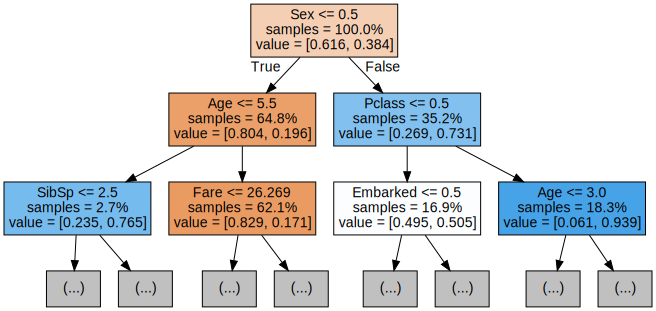

In [76]:
# Tree Visualisation
# We can actually look a small portion of some of the decision trees used to create the random forest.
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import numpy as np

dot_data = export_graphviz(clf,
                            feature_names=X_train.columns,
                            filled=True,
                            max_depth=2,
                            impurity=False,
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

This shows us that Sex was the feature used as the first node, and it make sense because from the correlation matrix we can see that it is the most higly correlated with survival. We also know that women and children were prioritized in the evacuation of the Titanic.

In order to force the tree to use a different feature for the root node, I will have to use a workaround. My plan is to use Age in the root node. I will split the data into two sets- one which will contain Age <= 5.5 and the other which will contain Age > 5.5. I will then pass the data sets each through its own decision tree.

I will then split the testing data by age as well, and feed those two sets into their respective tree. Combining the output of the two trees will give us a full set of predictions to be compared against the test predictions, thus combining the performance of two trees.

# Forcing a Different Root Node

In [77]:
# Split the data by filtering the Age column
titanic_age_less_5 = titanic_passenger_data[titanic_passenger_data['Age'] <= 5.5]

In [78]:
titanic_age_less_5.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.704545,0.659091,0.477273,2.503864,1.704545,1.363636,31.528030,0.272727
std,0.461522,0.913546,0.505258,1.439669,1.503168,0.532258,29.434829,0.544043
min,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,8.516700,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,18.237500,0.000000
50%,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,26.000000,0.000000
75%,1.000000,2.000000,1.000000,4.000000,3.000000,2.000000,31.387500,0.000000
max,1.000000,2.000000,1.000000,5.000000,5.000000,2.000000,151.550000,2.000000


In [79]:
titanic_age_greater_5 = titanic_passenger_data[titanic_passenger_data['Age'] > 5.5]

In [80]:
titanic_age_greater_5.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,0.367178,0.655254,0.345927,31.111858,0.461629,0.330579,32.239334,0.363636
std,0.482320,0.793989,0.475951,11.716481,1.043104,0.785084,50.535221,0.643204
min,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,0.000000,0.000000,29.699118,0.000000,0.000000,13.500000,0.000000
75%,1.000000,1.000000,1.000000,36.000000,1.000000,0.000000,30.695800,1.000000
max,1.000000,2.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


At first I wanted to split the data into Age <5.5 and Age >5.5, however the number of records in the younger age group was too low- 44 records out of 800. The resulting model was overfit, and so I went with Age 25 to even out the distribution accross the two sub-data sets.

# Sub-Tree 1

In [81]:
# Separating features and target for the Age <= 5.5 data set
X2 = titanic_age_less_5.drop(['Survived', 'Age'], axis=1)
y2 = titanic_age_less_5['Survived']

# Splitting data into train and test using train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=60, stratify=y2)

# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred2 = clf2.predict(X_test2)

y_pred2 = clf2.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2)
recall2 = recall_score(y_test2, y_pred2)

print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)

Accuracy: 0.9285714285714286
Precision: 0.9090909090909091
Recall: 1.0


I split the data set accross the Age<=5.5 threshold. I used this number because the original tree did so in the second layer, and so for this workaround to technically make the Age feature the firt layer I used the same number.

The perfect recall score was suspicious to me. I investigated and found that the data set of people of age <=5.5 was 44 records long, which might mean an overfitting situation. Thankfully we have another tree to build with much more data.

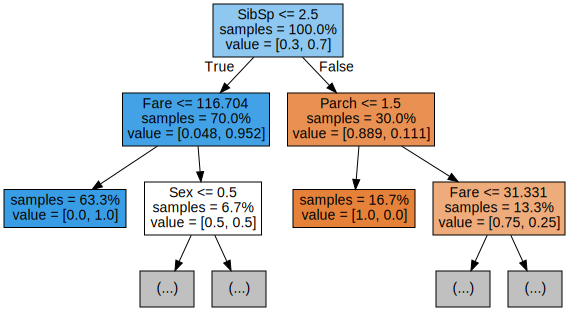

In [82]:
dot_data2 = export_graphviz(clf2,
                            feature_names=X_train2.columns,
                            filled=True,
                            max_depth=2,
                            impurity=False,
                            proportion=True)
graph2 = graphviz.Source(dot_data2)
display(graph2)

# Sub-Tree 2

In [83]:
# Separating features and target Age > 5.5 data set
X3 = titanic_age_greater_5.drop(['Survived', 'Age'], axis=1)
y3 = titanic_age_greater_5['Survived']

# Splitting data into train and test using train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=60, stratify=y3)

# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train3, y_train3)

#Predict the response for test dataset
y_pred3 = clf3.predict(X_test3)

y_pred3 = clf3.predict(X_test3)

accuracy3 = accuracy_score(y_test3, y_pred3)
precision3 = precision_score(y_test3, y_pred3)
recall3 = recall_score(y_test3, y_pred3)

print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:", recall3)

Accuracy: 0.8117647058823529
Precision: 0.8194444444444444
Recall: 0.6276595744680851


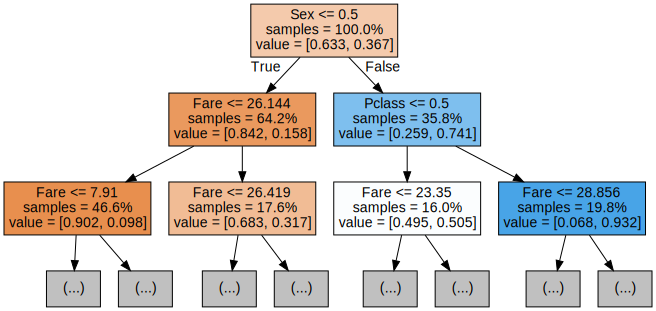

In [84]:
dot_data3 = export_graphviz(clf3,
                            feature_names=X_train3.columns,
                            filled=True,
                            max_depth=2,
                            impurity=False,
                            proportion=True)
graph3 = graphviz.Source(dot_data3)
display(graph3)

# Combining the Predictions

In [85]:
y_test2

348    1
869    1
644    1
58     1
479    1
16     0
233    1
78     1
642    0
119    0
205    0
691    1
831    1
827    1
Name: Survived, dtype: int64

In [86]:
y_test3

544    0
730    1
144    0
658    0
769    0
      ..
277    0
120    0
865    1
291    1
607    1
Name: Survived, Length: 255, dtype: int64

In [87]:
# Combining the test results from the two trees
y_combined_test = pd.concat([y_test2, y_test3])

In [88]:
y_combined_test

348    1
869    1
644    1
58     1
479    1
      ..
277    0
120    0
865    1
291    1
607    1
Name: Survived, Length: 269, dtype: int64

In [89]:
y_pred2

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [90]:
y_pred3

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [97]:
# Combine the two prediction sets from the two trees
y_combined_pred = np.concatenate((y_pred2, y_pred3))

In [92]:
y_combined_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0])

In [93]:
# Use the combined test and predictions to score the two trees as one

accuracy_combined = accuracy_score(y_combined_test, y_combined_pred)
precision_combined = precision_score(y_combined_test, y_combined_pred)
recall_combined = recall_score(y_combined_test, y_combined_pred)

print("Accuracy:", accuracy_combined)
print("Precision:", precision_combined)
print("Recall:", recall_combined)

Accuracy: 0.8178438661710037
Precision: 0.8313253012048193
Recall: 0.6634615384615384


Default tree:
* Accuracy: 0.7686567164179104
* Precision: 0.6814159292035398
* Recall: 0.7475728155339806


Modified tree:
* Accuracy: 0.8178438661710037
* Precision: 0.8313253012048193
* Recall: 0.6634615384615384

The scores for accuracy and precision went up, while the recall decreased. The newer model will more often predict correctly (more accurate), whether survived or not. It's positive predictions will be correct more often (more precise), ie less false positives. However it will be less likely to find all instances of survival (worse recall) which means some survival cases might be incorrectly labeled as non-survivals, ie more false negatives.

Initially I thought the reduction in recall might make the second model unusable, but thinking about it further it might still be useful because it't not as big a deal to be a little zealous when labelling those at risk.

In [98]:
# Create the random forest classifier and train it on the newly separated training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7985074626865671
Precision: 0.7474747474747475
Recall: 0.7184466019417476


The random forest has very balances scores- a little better than the default tree in accuracy while improving on the hybrid tree when it comes to the recall.

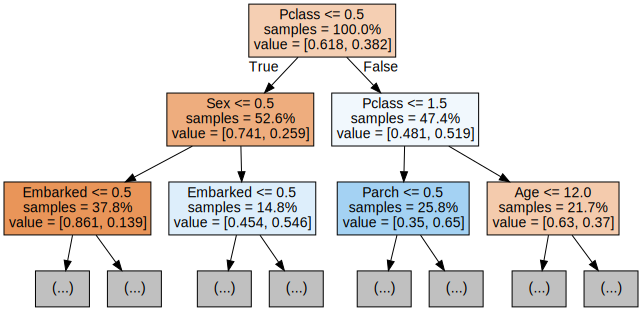

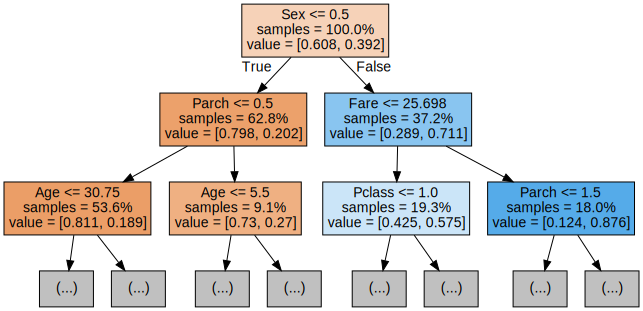

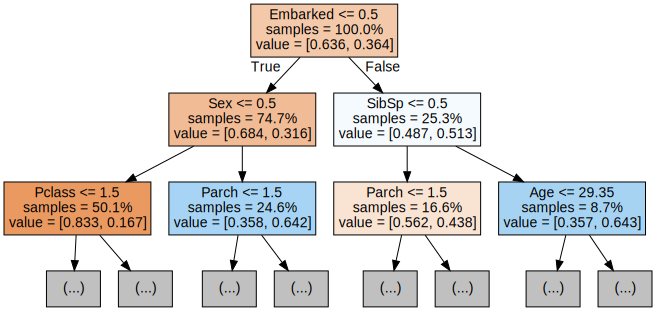

In [96]:
# Tree Visualisation
# We can actually look a small portion of some of the decision trees used to create the random forest.
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)